# Desafio Neoway - EDA

<p><b>Cientista de Dados:</b> Cassiano J. Pereira</p>
<p><b>Data:</b> 22/11/2021</p>

## Bibliotecas Utilizadas

In [139]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.cluster import KMeans
import sqlite3
import seaborn as sbn
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [140]:
seed = 42

In [141]:
file1 = "individuos_espec.csv"
file2 = "conexoes_espec.csv"

## Funções Auxiliares

In [142]:
def preenchimento_homogeneo(dfx, coluna, categorias):
    dados_faltantes = dfx[df_individuos[coluna].isnull()]
    tamanho_categoria = len(categorias)

    for c, i in enumerate(dados_faltantes.index):
        dfx.loc[i, coluna] = categorias[c % tamanho_categoria]

In [143]:
def preenchimento_randomico(dfx, coluna):
    media = dfx[coluna].mean()
    desvio = dfx[coluna].std()
    limite_abaixo = media - desvio
    limite_acima = media + desvio
    nao_faltantes = dfx[~dfx[coluna].isnull()]
    dados_faltantes = dfx[dfx[coluna].isnull()]
    valores = nao_faltantes[(nao_faltantes[coluna] <= limite_acima) & (nao_faltantes[coluna] >= limite_abaixo)][coluna].to_list()
    
    for i in dados_faltantes.index:
        dfx.loc[i, coluna] = random.choice(valores)

## Análise da Tabela "Individuos Espec"

In [144]:
df_individuos = pd.read_csv(file1, sep=';')
df_individuos

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC
0,1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956
1,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720
2,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393
3,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053
4,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668
...,...,...,...,...,...,...,...,...,...
999995,999996,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771
999996,999997,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402
999997,999998,30.0,divorciado,1.0,0.0,0.0,1.0,publico,NaN
999998,999999,33.0,casado,0.0,1.0,1.0,1.0,publico,16.979569


In [145]:
df_individuos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   name                       1000000 non-null  int64  
 1   idade                      904063 non-null   float64
 2   estado_civil               949927 non-null   object 
 3   qt_filhos                  971133 non-null   float64
 4   estuda                     959870 non-null   float64
 5   trabalha                   993647 non-null   float64
 6   pratica_esportes           850876 non-null   float64
 7   transporte_mais_utilizado  956967 non-null   object 
 8   IMC                        886130 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 68.7+ MB


In [146]:
df_individuos.corr()

,name,idade,qt_filhos,estuda,trabalha,pratica_esportes,IMC
name,1.000000,-0.000603,0.000215,-0.000628,0.000905,-0.000195,0.000657
idade,-0.000603,1.000000,0.116169,-0.138990,0.136843,0.001264,-0.000375
qt_filhos,0.000215,0.116169,1.000000,-0.080367,0.079386,-0.000543,-0.000338
estuda,-0.000628,-0.138990,-0.080367,1.000000,-0.096353,-0.000010,0.000352
trabalha,0.000905,0.136843,0.079386,-0.096353,1.000000,0.001183,-0.000959
pratica_esportes,-0.000195,0.001264,-0.000543,-0.000010,0.001183,1.000000,-0.001414
IMC,0.000657,-0.000375,-0.000338,0.000352,-0.000959,-0.001414,1.000000


In [147]:
df_individuos[df_individuos.duplicated(['name'], keep=False)]

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC


_Nenhum dado duplicado_

### Exploração e Tratamento dos Dados Categoricos da Tabela "Individuos Espec"

In [148]:
df_individuos['estado_civil'] = df_individuos['estado_civil'].astype('category')
df_individuos['transporte_mais_utilizado'] = df_individuos['transporte_mais_utilizado'].astype('category')

In [149]:
df_individuos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   name                       1000000 non-null  int64   
 1   idade                      904063 non-null   float64 
 2   estado_civil               949927 non-null   category
 3   qt_filhos                  971133 non-null   float64 
 4   estuda                     959870 non-null   float64 
 5   trabalha                   993647 non-null   float64 
 6   pratica_esportes           850876 non-null   float64 
 7   transporte_mais_utilizado  956967 non-null   category
 8   IMC                        886130 non-null   float64 
dtypes: category(2), float64(6), int64(1)
memory usage: 55.3 MB


#### Categoria "estado civil"

In [150]:
coluna = 'estado_civil'
agrupado = df_individuos.groupby(coluna).size()
agrupado

estado_civil
casado        265030
divorciado    176054
solteiro      420637
viuvo          88206
dtype: int64

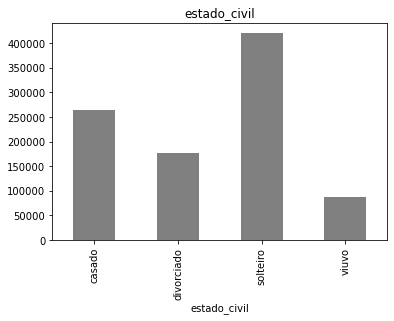

In [151]:
agrupado.plot.bar(color='gray').set_title(coluna);

_grafícos em tons de cinza para incluir deficiêntes de daltonismo_

In [152]:
df_individuos[coluna].isnull().sum()

50073

preenchimento dos dados faltantes da variável "estado civil"

In [153]:
categorias = df_individuos[~df_individuos[coluna].isnull()][coluna].unique()
preenchimento_homogeneo(df_individuos, coluna, categorias)

In [154]:
df_individuos[coluna].isnull().sum()

0

In [155]:
df_individuos.groupby(coluna).size()

estado_civil
casado        277548
divorciado    188573
solteiro      433155
viuvo         100724
dtype: int64

#### Categoria "transporte mais utilizado"

In [156]:
coluna = 'transporte_mais_utilizado'
agrupado = df_individuos.groupby(coluna).size()
agrupado

transporte_mais_utilizado
particular    334088
publico       574779
taxi           48100
dtype: int64

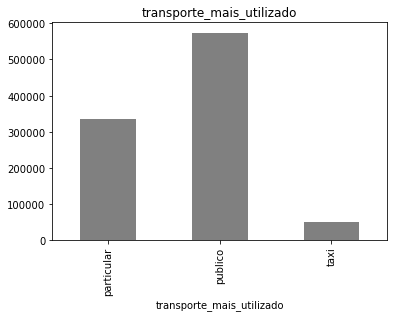

In [157]:
agrupado.plot.bar(color='gray').set_title(coluna);

In [158]:
df_individuos[coluna].isnull().sum()

43033

preenchimento dos dados faltantes da variável "transporte mais utilizado"

In [159]:
categorias = df_individuos[~df_individuos[coluna].isnull()][coluna].unique()
preenchimento_homogeneo(df_individuos, coluna, categorias)

In [160]:
df_individuos[coluna].isnull().sum()

0

In [161]:
df_individuos.groupby(coluna).size()

transporte_mais_utilizado
particular    348432
publico       589124
taxi           62444
dtype: int64

#### Categoria "estuda"

In [162]:
coluna = 'estuda'
agrupado = df_individuos.groupby(coluna).size()
agrupado

estuda
0.0    535043
1.0    424827
dtype: int64

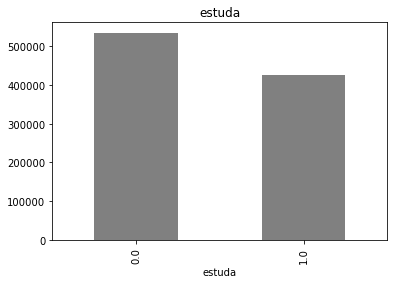

In [163]:
agrupado.plot.bar(color='gray').set_title(coluna);

In [164]:
df_individuos[coluna].isnull().sum()

40130

preenchimento dos dados faltantes da variável "estuda"

In [165]:
categorias = df_individuos[~df_individuos[coluna].isnull()][coluna].unique()
preenchimento_homogeneo(df_individuos, coluna, categorias)

In [166]:
df_individuos[coluna].isnull().sum()

0

In [167]:
df_individuos.groupby(coluna).size()

estuda
0.0    555108
1.0    444892
dtype: int64

#### Categoria "trabalha"

In [168]:
coluna = 'trabalha'
agrupado = df_individuos.groupby(coluna).size()
agrupado

trabalha
0.0    440445
1.0    553202
dtype: int64

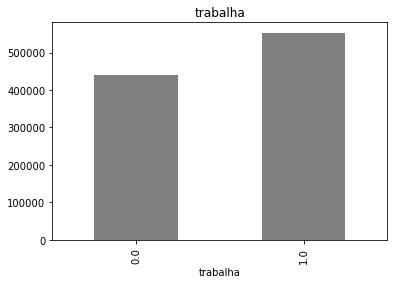

In [169]:
agrupado.plot.bar(color='gray').set_title(coluna);

In [170]:
df_individuos[coluna].isnull().sum()

6353

preenchimento dos dados faltantes da variável "trabalha"

In [171]:
categorias = df_individuos[~df_individuos[coluna].isnull()][coluna].unique()
preenchimento_homogeneo(df_individuos, coluna, categorias)

In [172]:
df_individuos[coluna].isnull().sum()

0

In [173]:
df_individuos.groupby(coluna).size()

trabalha
0.0    443622
1.0    556378
dtype: int64

#### Categoria "pratica_esportes"

In [174]:
coluna = 'pratica_esportes'
agrupado = df_individuos.groupby(coluna).size()
agrupado

pratica_esportes
0.0    340501
1.0    510375
dtype: int64

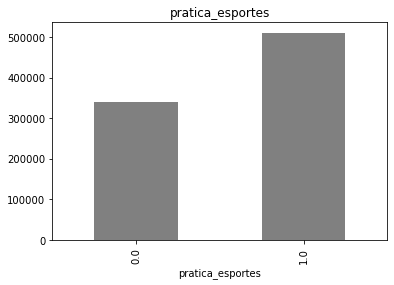

In [175]:
agrupado.plot.bar(color='gray').set_title(coluna);

In [176]:
df_individuos[coluna].isnull().sum()

149124

preenchimento dos dados faltantes da variável "pratica esportes"

In [177]:
categorias = df_individuos[~df_individuos[coluna].isnull()][coluna].unique()
preenchimento_homogeneo(df_individuos, coluna, categorias)

In [178]:
df_individuos[coluna].isnull().sum()

0

In [179]:
df_individuos.groupby(coluna).size()

pratica_esportes
0.0    415063
1.0    584937
dtype: int64

### Exploração e Tratamento dos Dados Numéricos da Tabela "Individuos Espec"

#### Coluna numérica "idade"

In [180]:
coluna = 'idade'
df_individuos[coluna].describe()

count    904063.000000
mean         30.008431
std          10.951566
min           0.000000
25%          22.000000
50%          29.000000
75%          37.000000
max         124.000000
Name: idade, dtype: float64

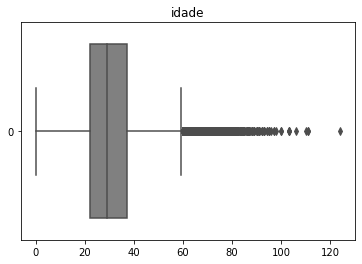

In [181]:
sbn.boxplot(data=df_individuos[coluna], color='gray', orient='h').set_title(coluna);

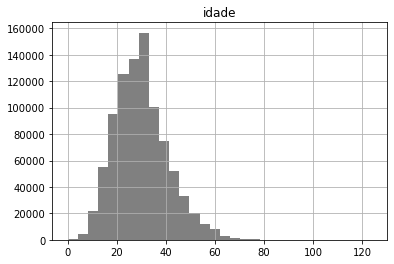

In [182]:
df_individuos[coluna].hist(bins=30, color='gray').set_title(coluna);

In [183]:
df_individuos[coluna].isnull().sum()

95937

preenchimento dos dados faltantes da variável "idade"

In [184]:
preenchimento_randomico(df_individuos, coluna)

In [185]:
df_individuos[coluna].isnull().sum()

0

In [186]:
df_individuos[coluna].describe()

count    1000000.000000
mean          29.933323
std           10.563641
min            0.000000
25%           22.000000
50%           29.000000
75%           36.000000
max          124.000000
Name: idade, dtype: float64

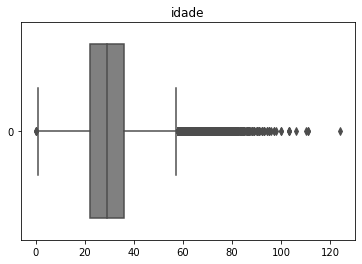

In [187]:
sbn.boxplot(data=df_individuos[coluna], color='gray', orient='h').set_title(coluna);

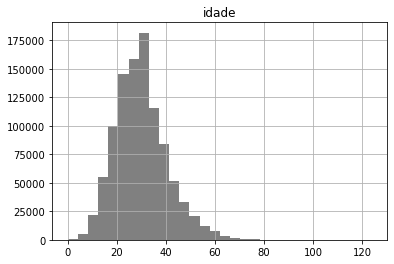

In [188]:
df_individuos[coluna].hist(bins=30, color='gray').set_title(coluna);

#### Coluna numérica "quantidade de filhos"

In [189]:
coluna = 'qt_filhos'
df_individuos[coluna].describe()

count    971133.000000
mean          0.928406
std           0.997289
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: qt_filhos, dtype: float64

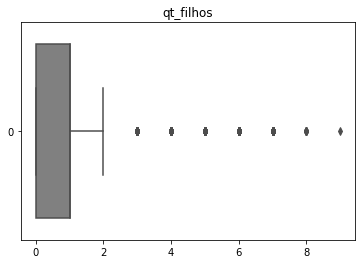

In [190]:
sbn.boxplot(data=df_individuos[coluna], color='gray', orient='h').set_title(coluna);

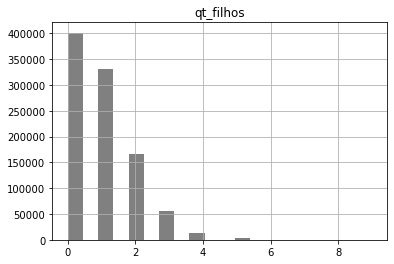

In [191]:
df_individuos[coluna].hist(bins=20, color='gray').set_title(coluna);

In [192]:
df_individuos[coluna].isnull().sum()

28867

preenchimento dos dados faltantes da variável "quantidade de filhos"

In [193]:
categorias = [0.0, 1.0]
preenchimento_homogeneo(df_individuos, coluna, categorias)

In [194]:
df_individuos[coluna].isnull().sum()

0

In [195]:
df_individuos[coluna].describe()

count    1000000.000000
mean           0.916039
std            0.989058
min            0.000000
25%            0.000000
50%            1.000000
75%            1.000000
max            9.000000
Name: qt_filhos, dtype: float64

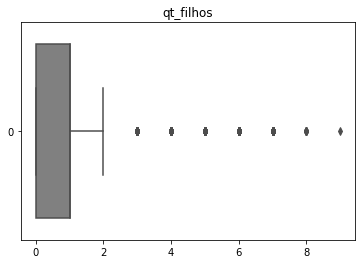

In [196]:
sbn.boxplot(data=df_individuos[coluna], color='gray', orient='h').set_title(coluna);

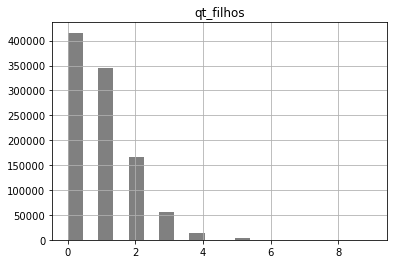

In [197]:
df_individuos[coluna].hist(bins=20, color='gray').set_title(coluna);

#### Coluna numérica "IMC"

In [198]:
coluna = 'IMC'
df_individuos[coluna].describe()

count    886130.000000
mean         22.472079
std           7.073692
min           4.852828
25%          17.420851
50%          21.431200
75%          26.378197
max          89.158204
Name: IMC, dtype: float64

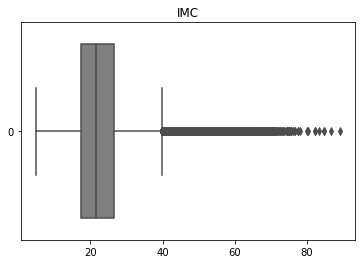

In [199]:
sbn.boxplot(data=df_individuos[coluna], color='gray', orient='h').set_title(coluna);

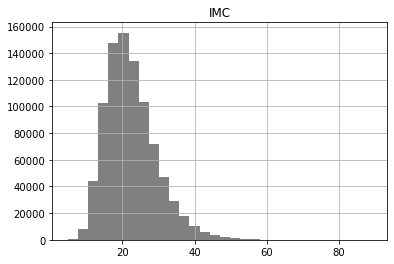

In [200]:
df_individuos[coluna].hist(bins=30, color='gray').set_title(coluna);

In [201]:
df_individuos[coluna].isnull().sum()

113870

preenchimento dos dados faltantes da variável "IMC"

In [202]:
preenchimento_randomico(df_individuos, coluna)

In [203]:
df_individuos[coluna].isnull().sum()

0

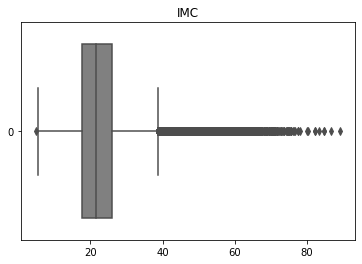

In [204]:
sbn.boxplot(data=df_individuos[coluna], color='gray', orient='h').set_title(coluna);

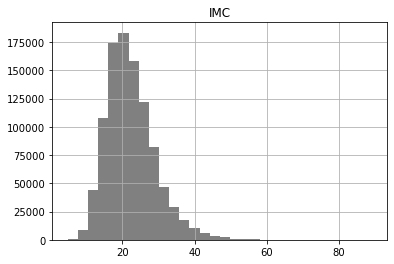

In [205]:
df_individuos[coluna].hist(bins=30, color='gray').set_title(coluna);

### Salvando a Tabela "Individuos Espec" Tratada

#### Verificando se ainda existe algum dado faltante

In [206]:
df_individuos.isnull().sum()

name                         0
idade                        0
estado_civil                 0
qt_filhos                    0
estuda                       0
trabalha                     0
pratica_esportes             0
transporte_mais_utilizado    0
IMC                          0
dtype: int64

In [207]:
file = 'individuos_espec_tratada.csv'
df_individuos.to_csv(file, sep=';', index=False)
df_individuos_tratada = pd.read_csv(file, sep=';')
df_individuos_tratada

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC
0,1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956
1,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720
2,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393
3,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053
4,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668
...,...,...,...,...,...,...,...,...,...
999995,999996,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771
999996,999997,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402
999997,999998,30.0,divorciado,1.0,0.0,0.0,1.0,publico,17.257126
999998,999999,33.0,casado,0.0,1.0,1.0,1.0,publico,16.979569


----------------------------

## Analise da Tabela "Conexoes Espec"

In [208]:
df_conexoes = pd.read_csv(file2, sep=';')
df_conexoes

,V1,V2,grau,proximidade,prob_V1_V2
0,1,2,trabalho,visita_frequente,0.589462
1,1,3,trabalho,visita_rara,0.708465
2,2,4,trabalho,visita_casual,NaN
3,2,5,trabalho,visita_rara,0.638842
4,3,6,amigos,mora_junto,NaN
...,...,...,...,...,...
999994,499998,999996,trabalho,visita_rara,NaN
999995,499998,999997,trabalho,visita_rara,NaN
999996,499999,999998,familia,visita_casual,0.451662
999997,499999,999999,familia,visita_rara,0.186973


In [209]:
df_conexoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   V1           999999 non-null  int64  
 1   V2           999999 non-null  int64  
 2   grau         999999 non-null  object 
 3   proximidade  999999 non-null  object 
 4   prob_V1_V2   499999 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 38.1+ MB


In [210]:
df_conexoes['grau'] = df_conexoes['grau'].astype('category')
df_conexoes['proximidade'] = df_conexoes['proximidade'].astype('category')

In [211]:
df_conexoes.isnull().sum()

V1                  0
V2                  0
grau                0
proximidade         0
prob_V1_V2     500000
dtype: int64

### Análise Exploratória dos Dados da Tabela "Conexoes Espec" 

In [212]:
coluna = 'grau'
agrupado = df_conexoes.groupby(coluna).size()
agrupado

grau
amigos      332965
familia     333486
trabalho    333548
dtype: int64

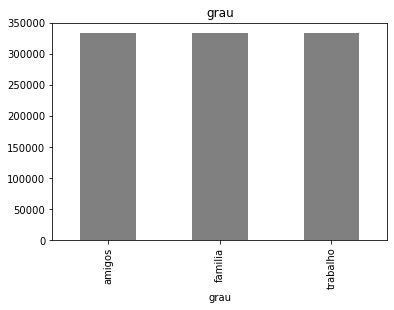

In [213]:
agrupado.plot.bar(color='gray').set_title(coluna);

In [214]:
coluna = 'proximidade'
agrupado = df_conexoes.groupby(coluna).size()
agrupado

proximidade
mora_junto          100290
visita_casual       299848
visita_frequente    199623
visita_rara         400238
dtype: int64

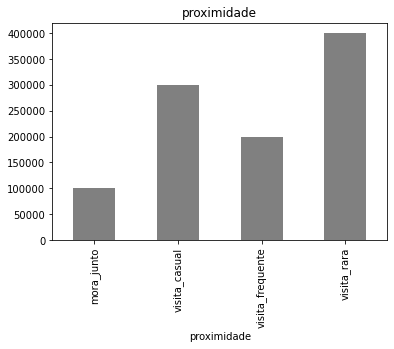

In [215]:
agrupado.plot.bar(color='gray').set_title(coluna);

In [216]:
coluna = 'prob_V1_V2'
df_conexoes[coluna].describe()

count    499999.000000
mean          0.485162
std           0.173963
min           0.074462
25%           0.351677
50%           0.486413
75%           0.618210
max           0.942245
Name: prob_V1_V2, dtype: float64

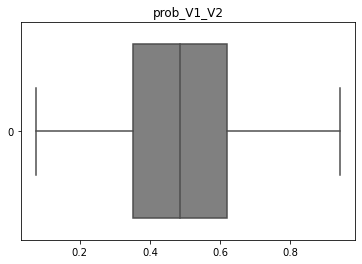

In [217]:
sbn.boxplot(data=df_conexoes[coluna], color='gray', orient='h').set_title(coluna);

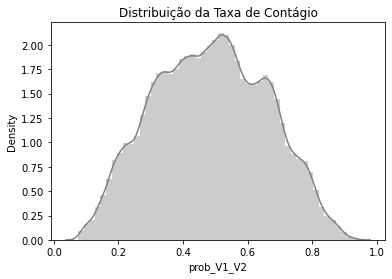

In [218]:
sbn.distplot(df_conexoes[coluna], color='gray').set_title('Distribuição da Taxa de Contágio');

---------

## Juntando os dados da tabela Conexoes com os dados dos Indivíduos Tratados

Junção da base de conexões com a base dos indivíduos tratada

In [219]:
df_conexoes

,V1,V2,grau,proximidade,prob_V1_V2
0,1,2,trabalho,visita_frequente,0.589462
1,1,3,trabalho,visita_rara,0.708465
2,2,4,trabalho,visita_casual,NaN
3,2,5,trabalho,visita_rara,0.638842
4,3,6,amigos,mora_junto,NaN
...,...,...,...,...,...
999994,499998,999996,trabalho,visita_rara,NaN
999995,499998,999997,trabalho,visita_rara,NaN
999996,499999,999998,familia,visita_casual,0.451662
999997,499999,999999,familia,visita_rara,0.186973


In [220]:
df_individuos_tratada

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC
0,1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956
1,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720
2,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393
3,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053
4,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668
...,...,...,...,...,...,...,...,...,...
999995,999996,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771
999996,999997,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402
999997,999998,30.0,divorciado,1.0,0.0,0.0,1.0,publico,17.257126
999998,999999,33.0,casado,0.0,1.0,1.0,1.0,publico,16.979569


In [221]:
#Make the db in memory
conn = sqlite3.connect(':memory:')
#write the tables
df_conexoes.to_sql('conexoes', conn, index=False)
df_individuos_tratada.to_sql('individuos', conn, index=False)

query = '''
    select  
        i1.idade idade1,
        i1.estado_civil estado_civil1,
        i1.qt_filhos qt_filhos1,
        i1.estuda estuda1,
        i1.trabalha trabalha1,
        i1.pratica_esportes pratica_esportes1,
        i1.transporte_mais_utilizado transporte_mais_utilizado1,
        i1.IMC IMC1,
        
        i2.idade idade2,
        i2.estado_civil estado_civil2,
        i2.qt_filhos qt_filhos2,
        i2.estuda estuda2,
        i2.trabalha trabalha2,
        i2.pratica_esportes pratica_esportes2,
        i2.transporte_mais_utilizado transporte_mais_utilizado2,
        i2.IMC IMC2,
        c.grau grau,
        c.proximidade proximidade,
        c.prob_V1_V2
    from
        conexoes c
    inner join individuos i1 on i1.name = c.V1
    inner join individuos i2 on i2.name = c.V2
    '''
df_individuos_conexoes_v1 = pd.read_sql_query(query, conn)

In [222]:
df_individuos_conexoes_v1

,idade1,estado_civil1,qt_filhos1,estuda1,trabalha1,pratica_esportes1,transporte_mais_utilizado1,IMC1,idade2,estado_civil2,qt_filhos2,estuda2,trabalha2,pratica_esportes2,transporte_mais_utilizado2,IMC2,grau,proximidade,prob_V1_V2
0,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,trabalho,visita_frequente,0.589462
1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,trabalho,visita_rara,0.708465
2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,trabalho,visita_casual,NaN
3,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,trabalho,visita_rara,0.638842
4,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,20.0,divorciado,1.0,0.0,1.0,0.0,publico,20.412942,amigos,mora_junto,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,23.0,casado,0.0,1.0,1.0,0.0,publico,22.036885,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771,trabalho,visita_rara,NaN
999995,23.0,casado,0.0,1.0,1.0,0.0,publico,22.036885,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402,trabalho,visita_rara,NaN
999996,26.0,casado,3.0,0.0,0.0,0.0,taxi,19.543889,30.0,divorciado,1.0,0.0,0.0,1.0,publico,17.257126,familia,visita_casual,0.451662
999997,26.0,casado,3.0,0.0,0.0,0.0,taxi,19.543889,33.0,casado,0.0,1.0,1.0,1.0,publico,16.979569,familia,visita_rara,0.186973


In [223]:
file = 'individuos_conexoes_v1.csv'
df_individuos_conexoes_v1.to_csv(file, sep=';', index=False)

--------

## Juntando os dados da tabela Conexoes com os dados dos Indivíduos Removidos

Junção da base de conexões com a base dos indivíduos com os registros faltantes completamente removidos

In [224]:
df_individuos2 = pd.read_csv(file1, sep=';')
df_individuos2

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC
0,1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956
1,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720
2,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393
3,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053
4,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668
...,...,...,...,...,...,...,...,...,...
999995,999996,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771
999996,999997,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402
999997,999998,30.0,divorciado,1.0,0.0,0.0,1.0,publico,NaN
999998,999999,33.0,casado,0.0,1.0,1.0,1.0,publico,16.979569


In [225]:
df_individuos2.dropna(inplace=True)
df_individuos2

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC
0,1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956
1,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720
2,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393
3,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053
4,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668
...,...,...,...,...,...,...,...,...,...
999990,999991,21.0,divorciado,1.0,1.0,1.0,0.0,publico,23.120396
999992,999993,66.0,divorciado,1.0,0.0,1.0,1.0,particular,19.363203
999995,999996,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771
999996,999997,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402


In [226]:
#Make the db in memory
conn = sqlite3.connect(':memory:')
#write the tables
df_conexoes.to_sql('conexoes', conn, index=False)
df_individuos2.to_sql('individuos', conn, index=False)

query = '''
    select  
        i1.idade idade1,
        i1.estado_civil estado_civil1,
        i1.qt_filhos qt_filhos1,
        i1.estuda estuda1,
        i1.trabalha trabalha1,
        i1.pratica_esportes pratica_esportes1,
        i1.transporte_mais_utilizado transporte_mais_utilizado1,
        i1.IMC IMC1,
        
        i2.idade idade2,
        i2.estado_civil estado_civil2,
        i2.qt_filhos qt_filhos2,
        i2.estuda estuda2,
        i2.trabalha trabalha2,
        i2.pratica_esportes pratica_esportes2,
        i2.transporte_mais_utilizado transporte_mais_utilizado2,
        i2.IMC IMC2,
        c.grau grau,
        c.proximidade proximidade,
        c.prob_V1_V2
    from
        conexoes c
    inner join individuos i1 on i1.name = c.V1
    inner join individuos i2 on i2.name = c.V2
    '''
df_individuos_conexoes_v2 = pd.read_sql_query(query, conn)

In [227]:
df_individuos_conexoes_v2

,idade1,estado_civil1,qt_filhos1,estuda1,trabalha1,pratica_esportes1,transporte_mais_utilizado1,IMC1,idade2,estado_civil2,qt_filhos2,estuda2,trabalha2,pratica_esportes2,transporte_mais_utilizado2,IMC2,grau,proximidade,prob_V1_V2
0,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,trabalho,visita_frequente,0.589462
1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,trabalho,visita_rara,0.708465
2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,trabalho,visita_casual,NaN
3,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,trabalho,visita_rara,0.638842
4,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,24.0,divorciado,0.0,0.0,0.0,1.0,publico,26.866953,trabalho,visita_frequente,0.658706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329113,47.0,casado,1.0,0.0,1.0,1.0,publico,31.921363,28.0,casado,1.0,1.0,1.0,0.0,particular,18.183257,trabalho,visita_casual,0.603042
329114,16.0,solteiro,3.0,1.0,0.0,0.0,publico,26.053920,66.0,divorciado,1.0,0.0,1.0,1.0,particular,19.363203,trabalho,visita_casual,0.621816
329115,23.0,casado,0.0,1.0,1.0,0.0,publico,22.036885,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771,trabalho,visita_rara,NaN
329116,23.0,casado,0.0,1.0,1.0,0.0,publico,22.036885,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402,trabalho,visita_rara,NaN


In [228]:
file = 'individuos_conexoes_v2.csv'
df_individuos_conexoes_v2.to_csv(file, sep=';', index=False)

---------